# Coordinate Reference Systems

## Introduction
The maps we create inthis course potray the surface of the earth in 2 dimensions. But the actual world is 3D. So we use a method called a map projection to render it as a flat surface.
<br>
Map projections can't be 100% accurate. EEach position distors the surface of the Earth in some way while retaining some important properties.
<br>
<br>
the equal-area projections (like "Lambert Cylindrical Equal Area", or "Africa Albers Equal Area Conic") preserve area. This is a good choice, if you'd like to calculate the area of a country or city, for example.<br>

the equidistant projections (like "Azimuthal Equidistant projection") preserve distance. This would be a good choice for calculating flight distance.

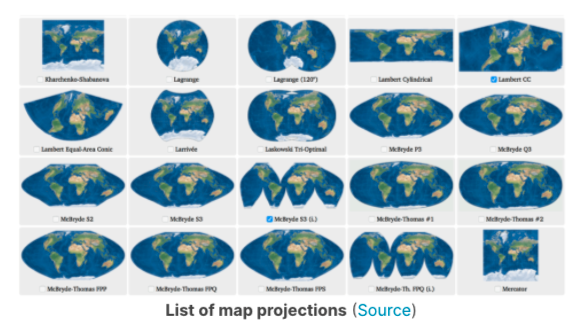

In [1]:
import geopandas as gpd
import pandas as pd

In [3]:
regions = gpd.read_file('../Datasets/ghana/Regions/Map_of_Regions_in_Ghana.shx')
print(regions.crs)

epsg:32630


In [4]:
regions.head()

,Region,geometry
0,Ashanti,"POLYGON ((686446.075 842986.894, 686666.193 84..."
1,Brong Ahafo,"POLYGON ((549970.457 968447.094, 550073.003 96..."
2,Central,"POLYGON ((603176.584 695877.238, 603248.424 69..."
3,Eastern,"POLYGON ((807307.254 797910.553, 807311.908 79..."
4,Greater Accra,"POLYGON ((858081.638 676424.913, 858113.115 67..."


Coordinate reference systems are references by European Petroleum Survey Group. This GeoDataFrame uses EPSG 32630 which is more commomly called Mercator projection. This projection preserves angles making it useful for sea navigation and slightly distorts area.<br>
However when creating a GeoDataFrame from a CSV file, we have to set the CRS. EPSG 4326 corresponds to coordinates in latitude and longitude.

In [7]:
facilities_df = pd.read_csv('../Datasets/ghana/health_facilities.csv')

#Converting the DataFrame to a GeoDataFrame
facilities = gpd.GeoDataFrame(facilities_df, geometry=gpd.points_from_xy(facilities_df.Longitude, facilities_df.Latitude))

#Set the coordinate reference system CRS to EPSG 4326
facilities.crs = {'init': 'epsg:4326'}

facilities.head()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


,Region,District,FacilityName,Type,Town,Ownership,Latitude,Longitude,geometry
0,Ashanti,Offinso North,A.M.E Zion Clinic,Clinic,Afrancho,CHAG,7.40801,-1.96317,POINT (-1.96317 7.40801)
1,Ashanti,Bekwai Municipal,Abenkyiman Clinic,Clinic,Anwiankwanta,Private,6.46312,-1.58592,POINT (-1.58592 6.46312)
2,Ashanti,Adansi North,Aboabo Health Centre,Health Centre,Aboabo No 2,Government,6.22393,-1.34982,POINT (-1.34982 6.22393)
3,Ashanti,Afigya-Kwabre,Aboabogya Health Centre,Health Centre,Aboabogya,Government,6.84177,-1.61098,POINT (-1.61098 6.84177)
4,Ashanti,Kwabre,Aboaso Health Centre,Health Centre,Aboaso,Government,6.84177,-1.61098,POINT (-1.61098 6.84177)


In [8]:
facilities_df.head()

,Region,District,FacilityName,Type,Town,Ownership,Latitude,Longitude,geometry
0,Ashanti,Offinso North,A.M.E Zion Clinic,Clinic,Afrancho,CHAG,7.40801,-1.96317,POINT (-1.96317 7.40801)
1,Ashanti,Bekwai Municipal,Abenkyiman Clinic,Clinic,Anwiankwanta,Private,6.46312,-1.58592,POINT (-1.58592 6.46312)
2,Ashanti,Adansi North,Aboabo Health Centre,Health Centre,Aboabo No 2,Government,6.22393,-1.34982,POINT (-1.34982 6.22393)
3,Ashanti,Afigya-Kwabre,Aboabogya Health Centre,Health Centre,Aboabogya,Government,6.84177,-1.61098,POINT (-1.61098 6.84177)
4,Ashanti,Kwabre,Aboaso Health Centre,Health Centre,Aboaso,Government,6.84177,-1.61098,POINT (-1.61098 6.84177)


In the code cell above, to create a GeoDataFrame from a CSV file, we needed to use both Pandas and GeoPandas:

We begin by creating a DataFrame containing columns with latitude and longitude coordinates.<br>
To convert it to a GeoDataFrame, we use gpd.GeoDataFrame().<br>
The gpd.points_from_xy() function creates Point objects from the latitude and longitude columns.